In [17]:
pip install matplotlib 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.8 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

delivery_income = df.groupby('Shipping Type')['Total Price'].sum()
product_income = df.groupby('Product Type')['Total Price'].sum()
monthly_addon_income = df.groupby('Month')['Add-on Total'].sum()
quarterly_addon_income = df.groupby('Quarter')['Add-on Total'].sum()

print("Доход: Метод доставки:")
print(delivery_income)
print("\nДоход: Тип продуктов:")
print(product_income)
print("\nДоход: Дополнительные услуги по месяцам:")
print(monthly_addon_income)
print("\nДоход: Дополнительные услуги по кварталам")
print(quarterly_addon_income)


Доход: Метод доставки:
Shipping Type
Expedited    12437526.21
Express       8685215.62
Overnight     8704828.17
Same Day     12432024.82
Standard     21343073.55
Name: Total Price, dtype: float64

Доход: Тип продуктов:
Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

Доход: Дополнительные услуги по месяцам:
Month
2023-09      8012.62
2023-10     37837.12
2023-11     34888.81
2023-12     33509.15
2024-01    136195.16
2024-02    120148.92
2024-03    124954.26
2024-04    123973.59
2024-05    132018.51
2024-06    126689.59
2024-07    132017.20
2024-08    135133.14
2024-09     99518.89
Freq: M, Name: Add-on Total, dtype: float64

Доход: Дополнительные услуги по кварталам
Quarter
2023Q3      8012.62
2023Q4    106235.08
2024Q1    381298.34
2024Q2    382681.69
2024Q3    366669.23
Freq: Q-DEC, Name: Add-on Total, dtype: float64


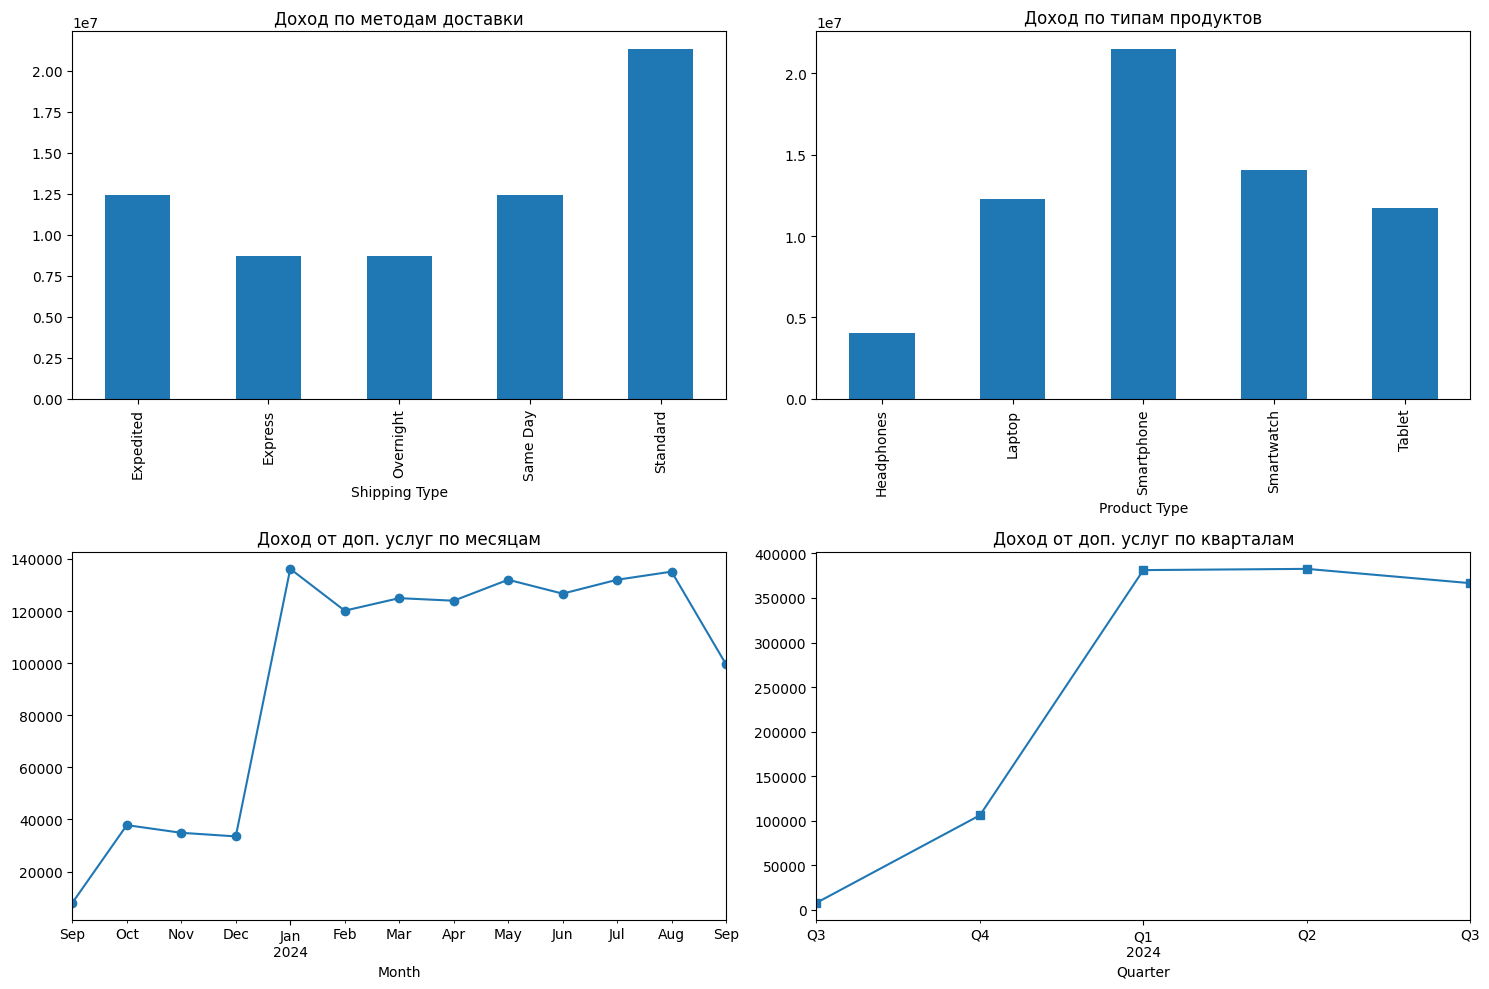

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

delivery_income.plot(kind='bar', ax=axes[0,0], title='Доход по методам доставки')
product_income.plot(kind='bar', ax=axes[0,1], title='Доход по типам продуктов')
monthly_addon_income.plot(kind='line', ax=axes[1,0], title='Доход от доп. услуг по месяцам', marker='o')
quarterly_addon_income.plot(kind='line', ax=axes[1,1], title='Доход от доп. услуг по кварталам', marker='s')

plt.tight_layout()
plt.show()